In [3]:
print(__doc__)
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline


Automatically created module for IPython interactive environment


In [ ]:
#import data and split
peptide = pd.read_excel(r'Featureset1.xlsx',sheet_name='sheet1')
print (peptide)
X=peptide.drop(['Lable'], axis=1)
y=peptide['Lable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Optimized Randomforest
oRFmodel = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt', n_estimators=200)
oRFmodel.fit(X_train, y_train)
y_pred1 = oRFmodel.predict(X_test)

In [ ]:
#Optimized Linear SVM 
from sklearn.svm import SVC
olSVM_model=SVC(kernel='linear',C=10, gamma=0.0001, probability=True)
olSVM_model.fit(X_train, y_train)
y_pred2 = olSVM_model.predict(X_test)

In [ ]:
#Tuned Decision tree
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtclassifier.fit(X_train, y_train)
y_pred4 = dtclassifier.predict(X_test)

In [ ]:
#Tuned KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21, p=1, leaf_size=40)
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)

In [ ]:
#Tuned BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb =  BernoulliNB(alpha=0.1)
bernoulli_nb.fit(X_train, y_train)
y_pred6 = bernoulli_nb.predict(X_test)

In [ ]:
#Tuned GaussianNB
from sklearn.naive_bayes import GaussianNB
Gaussian_nb = GaussianNB(var_smoothing=0.0001232847)
Gaussian_nb.fit(X_train, y_train)
y_pred7 = Gaussian_nb.predict(X_test)

In [ ]:
# Ensemble model with majority voting 
voting_clf = VotingClassifier(estimators=[('GNB', Gaussian_nb), ('Bnb', bernoulli_nb),('KNN', knn),('DT', dtclassifier),('olSVM', olSVM_model),('RF', oRFmodel)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)

In [ ]:
#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
MCC = matthews_corrcoef(y_test, preds)
accuracy = accuracy_score(y_test, preds)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
roc_auc = roc_auc_score(y_test, preds)
f1 = f1_score(y_test, preds)
print('\nMCC:', MCC)
print('\nAccuracy: ', accuracy)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)

In [ ]:
# prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import joblib
pipe = make_pipeline(StandardScaler(), voting_clf)
pipe.fit(X_train, y_train)
joblib.dump(pipe, 'model.pkl')

In [12]:
#Prediction
#Loading the saved model with joblib
pipe = joblib.load('model.pkl')

# New data to predict
pr = pd.read_excel(r'predictions.xlsx')
pred_cols = list(pr.columns.values)[:-1]

# apply the whole pipeline to data
pred = pd.Series(pipe.predict(pr[pred_cols]))
print (pred)
pred.predict_proba(pred_cols)[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64


AttributeError: 'Series' object has no attribute 'predict_proba'

True Positives: 40
False Positives: 5
True Negatives: 35
False Negatives: 4
[[35  5]
 [ 4 40]]


<AxesSubplot:>

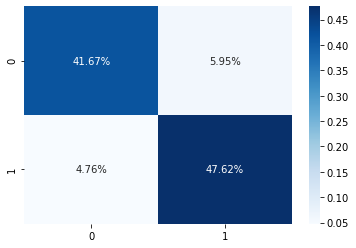

In [13]:
# Get the tn, fp, fn, tp
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')